In [67]:
import os
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from operator import itemgetter
from collections import OrderedDict

In [48]:
def mask2bbox(mask):
    """给定一个mask，返回所有的bbox: [y, x, h, w]"""
    lbl = label(mask) 
    props = regionprops(lbl)
    bbox = [(prop.bbox[1], prop.bbox[0], prop.bbox[3] - prop.bbox[1], prop.bbox[2] - prop.bbox[0]) \
            for prop in props if prop.bbox[3] - prop.bbox[1] > 3 and prop.bbox[2] - prop.bbox[0] > 3]
    return bbox

In [105]:
def GrabAlgo(img, bbox):
    new_img = np.zeros(img.shape[:2]).astype(np.uint8)
    for i in range(len(bbox)):
        mask = np.zeros(img.shape[:2], np.uint8)
        bgdModel = np.zeros((1, 65), np.float64)
        fgdModel = np.zeros((1, 65), np.float64)
        mask1, bgd, fgd = cv2.grabCut(img, mask, bbox[i], bgdModel, fgdModel, 15, cv2.GC_INIT_WITH_RECT)
        index = (mask == cv2.GC_FGD) | (mask == cv2.GC_PR_FGD)
        new_img[index] = 1
    return new_img

In [11]:
"""img, img_gt should be binary numpy ndarray, where 0 is foreground, 1 is background"""
def cal_F(img, img_gt):
    img_sum = img.sum()
    gt_sum = img_gt.sum()
    
    cross_img = np.logical_and(img, img_gt).astype(np.int)
    cross_sum = cross_img.sum()
    
    precision = cross_sum / img_sum
    recall = cross_sum / gt_sum
    
    fscore = 2 * precision * recall / (precision + recall)
    return fscore    

In [3]:
image_path = os.path.join("../", "orderedImages/")
mask_path = os.path.join("../", "orderedTruths/")
print(image_path)
print(mask_path)

../orderedImages/
../orderedTruths/


In [4]:
image_name = list()
for path, _dir, file_name in os.walk(image_path):
    image_name.extend(file_name)
image_name = [x for x in image_name if x.endswith(".jpg")]

mask_name = list()
for path, _dir, file_name in os.walk(mask_path):
    mask_name.extend(file_name)
mask_name = [x for x in mask_name if x.endswith(".bmp")]

In [8]:
assert len(image_name) == len(mask_name)

In [106]:
f_score = dict()
for i in range(len(image_name)):
    print("Processing image {}".format(image_name[i]), end='\r')
    img = imread(image_path + image_name[i])
    mask = imread(mask_path + mask_name[i])[:, :, 0]
    mask[mask >= 1] = 1
    bbox = mask2bbox(mask)
    new_img = GrabAlgo(img, bbox)
    F = cal_F(new_img, mask)
    f_score[image_name[i]] = F

In [107]:
sorted_f = OrderedDict(sorted(f_score.items(), key=itemgetter(1)))

In [114]:
scores = f_score.keys()
print(f_score[scores])
mean_score = np.array(scores).mean(axis=0)
print("Mean score: ", mean_score)

TypeError: unhashable type: 'dict_keys'

In [109]:
i = 0
for key in sorted_f.keys():
    img = imread(image_path + key)
    mask = imread(mask_path + key[:-4] + "_gt.bmp")[:, :, 0].astype(np.uint8)
    mask[mask >= 1] = 1
    bbox = mask2bbox(mask)
    new_img = GrabAlgo(img, bbox)
    i += 1
    if i > 0:
        break

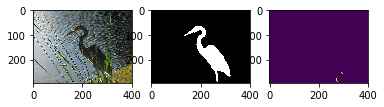

In [110]:
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(mask, cmap="gray")
plt.subplot(133)
plt.imshow(new_img)

In [108]:
print(sorted_f)

OrderedDict([('30446.jpg', 0.001797106658280169), ('30140.jpg', 0.23154666816514274), ('30891.jpg', 0.3652668416447944), ('30375.jpg', 0.3868468944920592), ('30416.jpg', 0.5545447161075461), ('30421.jpg', 0.5725112753987074), ('30259.jpg', 0.5814778500757642), ('30258.jpg', 0.5839560333606517), ('30154.jpg', 0.5895734597156399), ('30609.jpg', 0.5910892166156428), ('30179.jpg', 0.6190296050327154), ('30702.jpg', 0.6355019666000388), ('30240.jpg', 0.6457165626245185), ('30090.jpg', 0.647220693450743), ('30114.jpg', 0.6488650207602994), ('30477.jpg', 0.6565435451245532), ('30271.jpg', 0.6712710488075904), ('30339.jpg', 0.6747942905121745), ('30684.jpg', 0.6853649068322981), ('30816.jpg', 0.7100110067320244), ('30123.jpg', 0.7259710899499898), ('30658.jpg', 0.7276651572220576), ('30943.jpg', 0.727697040415827), ('30937.jpg', 0.732622851091634), ('30511.jpg', 0.7379067722075637), ('30914.jpg', 0.7506432841138515), ('30299.jpg', 0.762331371425595), ('30523.jpg', 0.765790002007629), ('30287.j

In [95]:
new_img = np.zeros(img.shape[:2]).astype(np.uint8)
for i in range(len(bbox)):
    mask = np.zeros(img.shape[:2], np.uint8)
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)
    mask1, bgd, fgd = cv2.grabCut(img, mask, bbox[i], bgdModel, fgdModel, 15, cv2.GC_INIT_WITH_RECT)
    index = (mask == cv2.GC_FGD) | (mask == cv2.GC_PR_FGD)
    new_img[index] = 1

In [93]:
print(bbox)

[(74, 122, 248, 107)]
